<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/ml/12_Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

문제정의: 환자 정보를 사용하여 심장 질환 유무(정상 :0, 심장 질환 진단: 1)를 분류하는 이중 분류 문제로 정의

In [1]:
# Libraries for reading and handling the data
import numpy as np
import pandas as pd

# Libraries for data cisualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

### step 1) 데이터 준비하기
- 데이터 다운로드 : https://archive.ics.uci.edu/ml/datasets/heart+disease


In [2]:
df = pd.read_csv('/content/heart.csv')

# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
# null값 확인
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### step 2) 데이터 전처리

In [4]:
# 숫자형태의 변수 -> 카테고리(범주형) 형태로 변경
categorical_var =['sex','cp','fbs','restecg','exng','slp','caa','thall']
df[categorical_var] = df[categorical_var].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


### step 3) 데이터 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



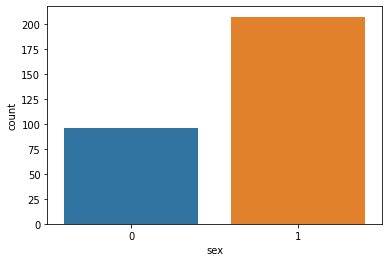

In [5]:
sns.countplot(df.sex)

In [8]:
# 가슴 통증 타입 별 심장질환 환자 수 (cp : chest pain type)
px.bar(df.groupby('cp').sum().reset_index()[['cp','output']],
       x ='cp', y='output',color='cp',
       title = 'Count plot of Heart Disease with Respect to Chest Pain')

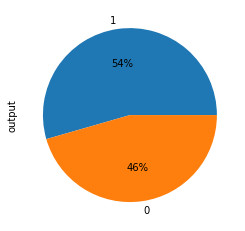

In [9]:
# 정상 - 심장병 환자 비율 (0: 정상, 1: 심장병)
df.output.value_counts().plot.pie(autopct='%1.f%%')

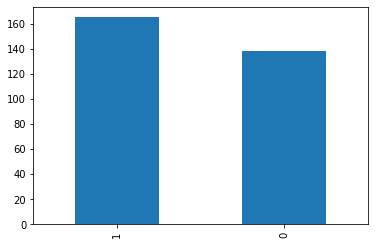

In [11]:
# 정상 - 심장병 환자 비율 (0: 정상, 1: 심장병)
df.output.value_counts().plot.bar()

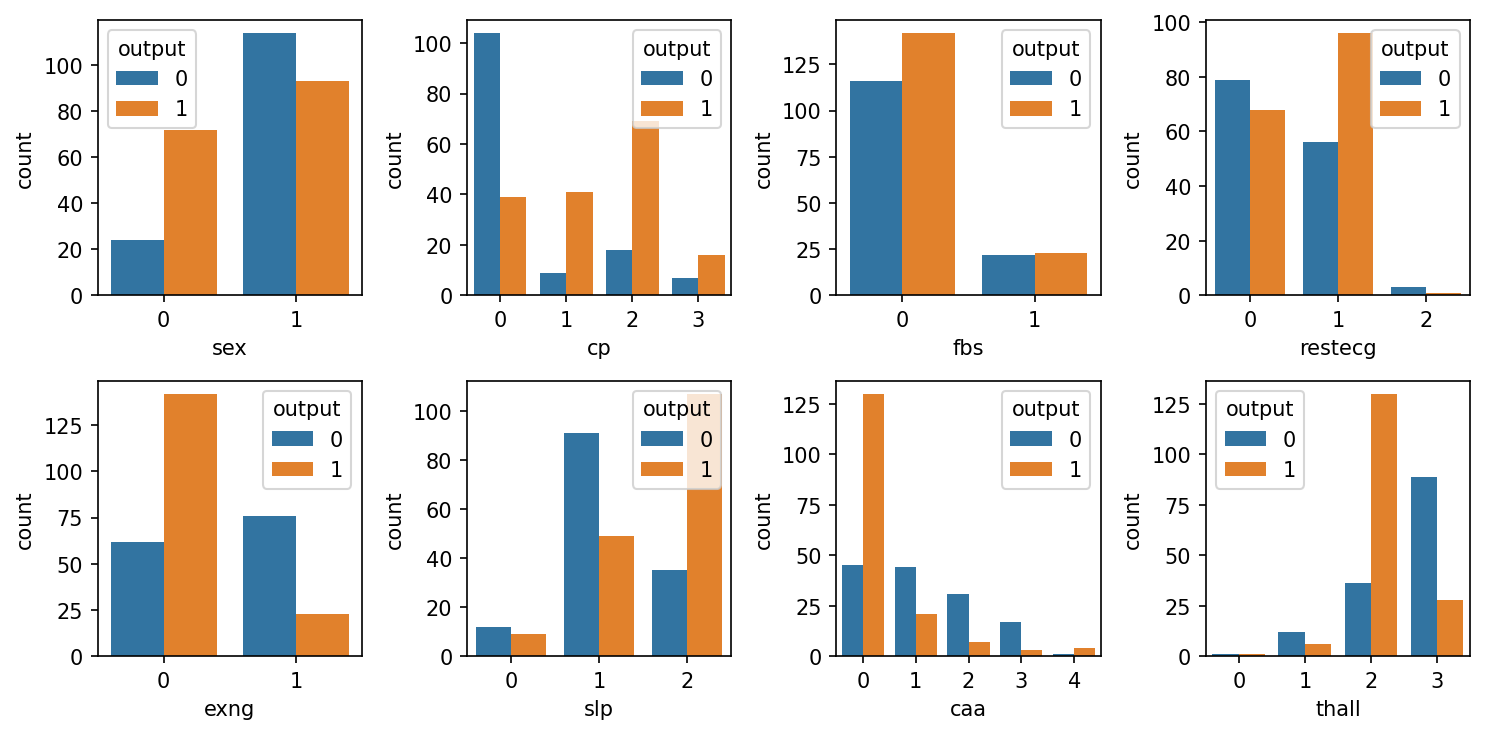

In [16]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인
fig,ax=plt.subplots(2,4,figsize=(10,5),dpi=150)

for axis, cat_var in zip(ax.ravel(), categorical_var) :
  sns.countplot(x=cat_var, data=df, hue='output',ax=axis)
  
plt.tight_layout()

In [17]:
# 수치형으로 되어 있는 컬럼 -> 이상치
numeric_var = [i for i in df.columns if i not in categorical_var][:-1]
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

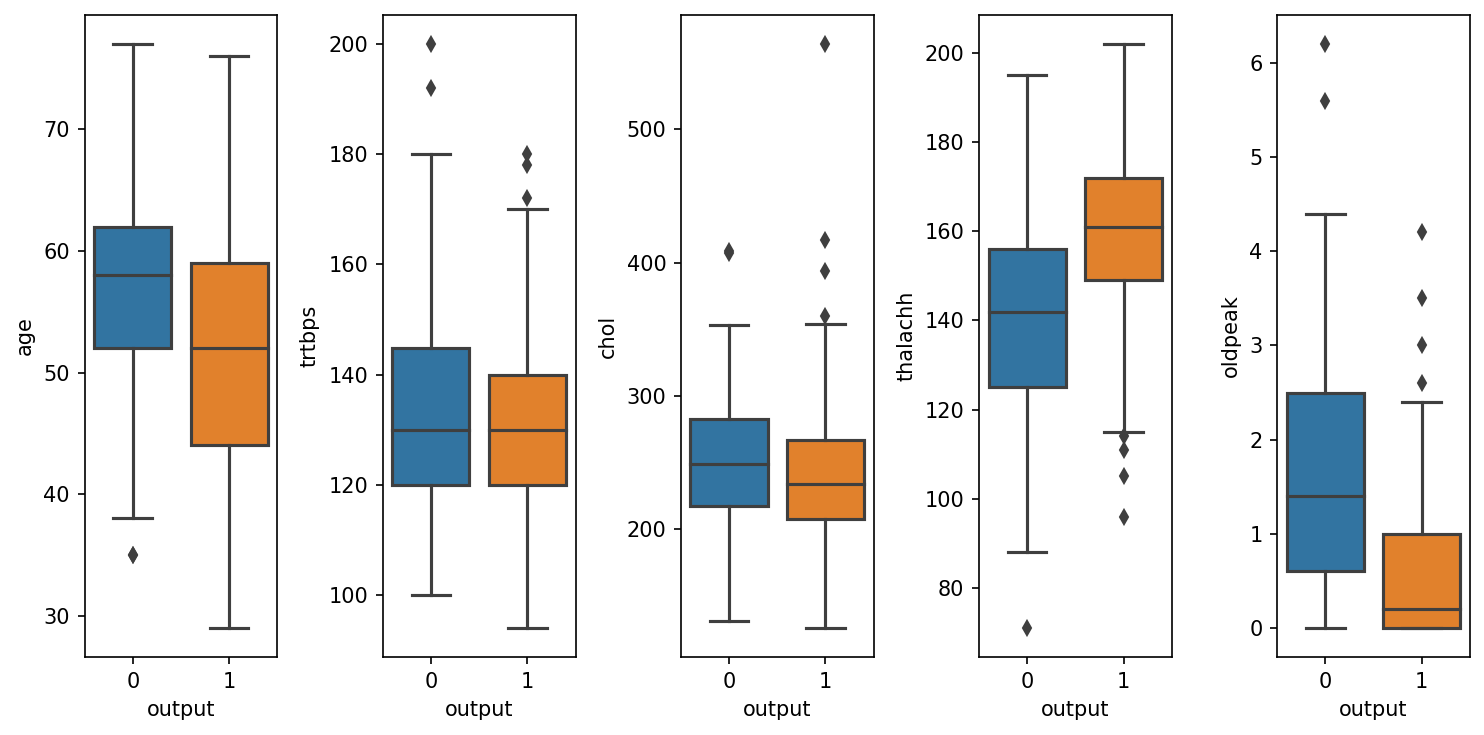

In [19]:
# 수치형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인
fig,ax=plt.subplots(1,5,figsize=(10,5),dpi=150)

for axis, num_var in zip(ax, numeric_var) :
  sns.boxplot(y=num_var, data=df, x='output',ax=axis)
  
plt.tight_layout()

In [20]:
# 이상치 삭제 'trtbps','chol','thalachh','oldpeak'
# 상위 95%의 위치하고 있는 데이터 셋만 삭제

df = df[df['trtbps'] < df['trtbps'].quantile(0.95)]
df = df[df['chol'] < df['chol'].quantile(0.95)]
df = df[df['thalachh'] < df['thalachh'].quantile(0.95)]
df = df[df['oldpeak'] < df['oldpeak'].quantile(0.95)]

In [22]:
# 하위 5%의 위치하고 있는 데이터 셋 삭제
df = df[df['thalachh'] > df['thalachh'].quantile(0.05)]

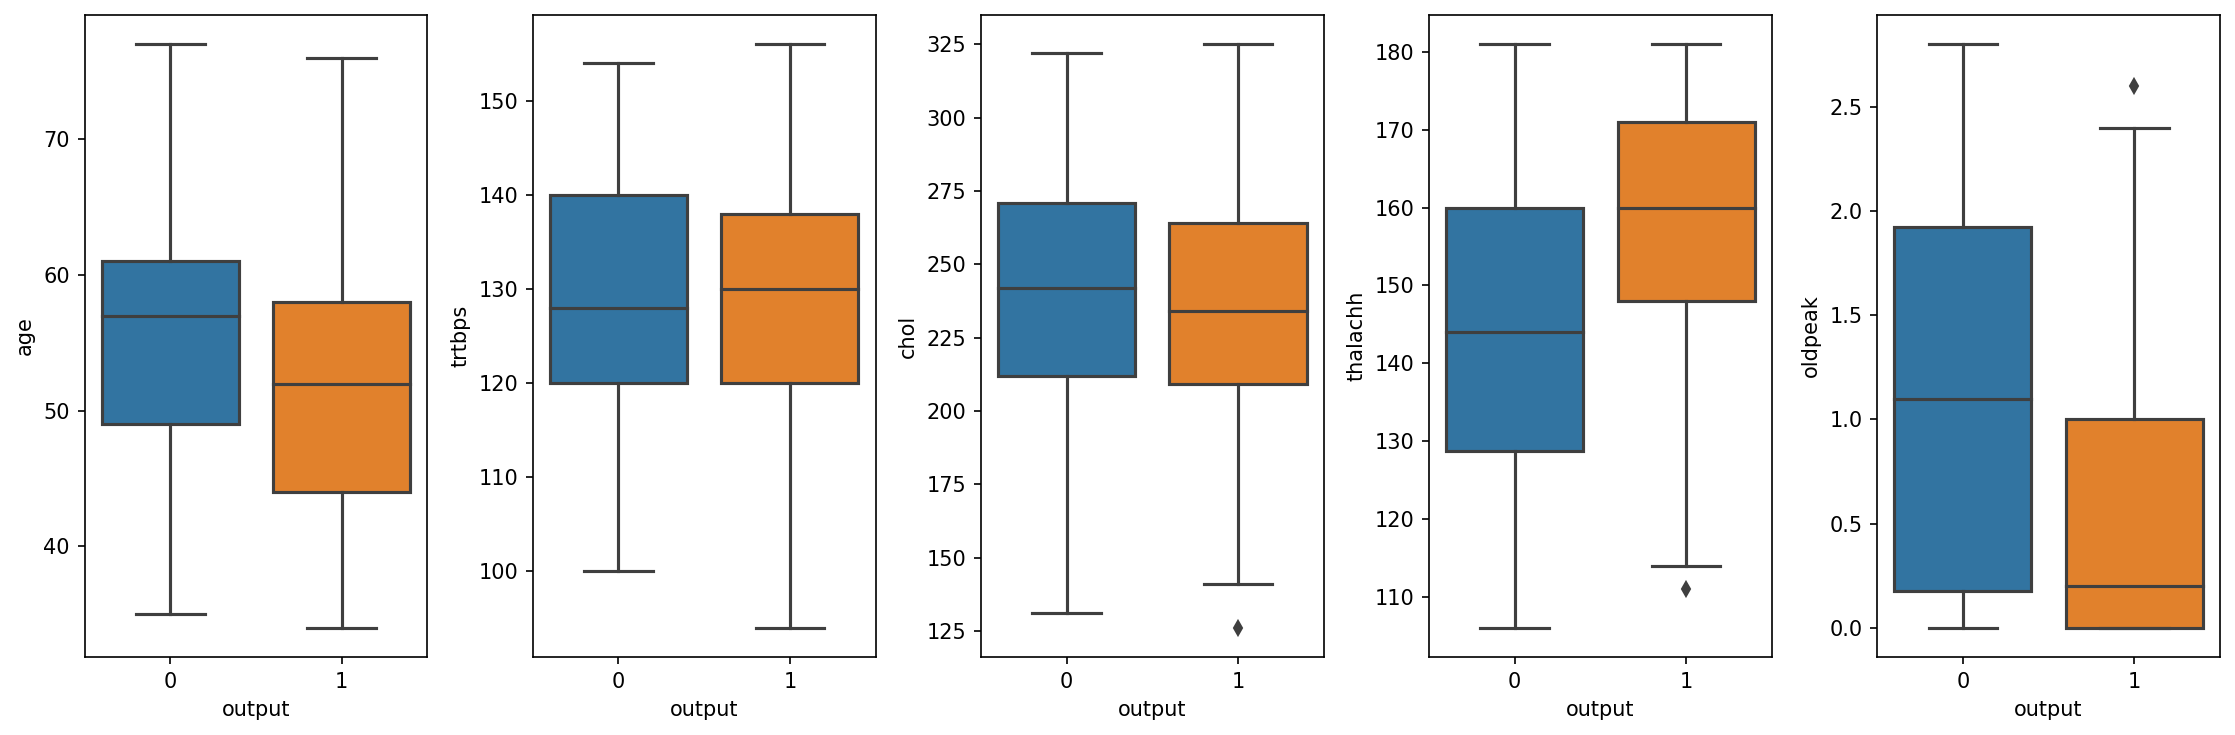

In [24]:
# 이상치 삭제 확인
fig,ax=plt.subplots(1,5,figsize=(15,5),dpi=150)

for axis, num_var in zip(ax, numeric_var) :
  sns.boxplot(y=num_var, data=df, x='output',ax=axis)
  
plt.tight_layout()

### step 4) 데이터 분리하기

In [25]:
# X(시험지), y(정답) 분리하기
X = df.iloc[:,:-1]
y = df['output']

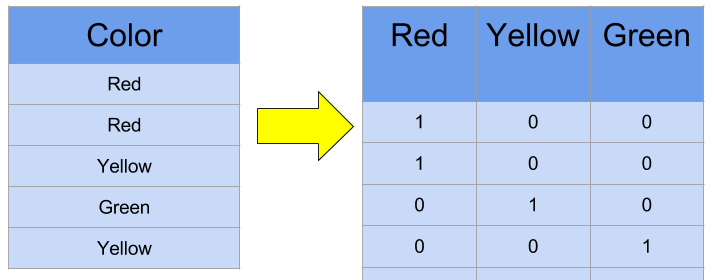

In [ ]:
# 원-핫 인코딩 처리
# 컬럼 -> 원-핫 인코딩 처리
temp = pd.get_dummies(X[categorical_var], drop_first = True)

In [ ]:
# 기존 데이터랑 합치기
X_modified = pd.concat([X, temp],axis=1)

In [28]:
# 기존 컬럼 삭제
X_modified.drop(categorical_var, axis=1, inplace=True)

In [29]:
X_modified.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [30]:
# 훈련용/테스트 데이터 분리하기
X_train,X_test,y_train,y_test = train_test_split(X_modified,y,
                                                 train_size=0.8,
                                                 random_state=7)

In [32]:
# 차원축소 (스케일링) -> 수치형 데이터 정규화
scaler = StandardScaler()
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

### step 5) 머신러닝 모델 구축
- LogisticRegression

In [33]:
# Logistic 
log_reg = LogisticRegression().fit(X_train,y_train)

In [35]:
# 정확도 확인
print('Train data Score : {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test data Score : {:.3f}'.format(log_reg.score(X_test,y_test)))

Train data Score : 0.875
Test data Score : 0.822


- Decision Tree

In [37]:
# Decision tree
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=20,
                              min_samples_split=40).fit(X_train,y_train)

In [38]:
# 정확도 확인
print('Train data Score : {:.3f}'.format(tree.score(X_train,y_train)))
print('Test data Score : {:.3f}'.format(tree.score(X_test,y_test)))

Train data Score : 0.767
Test data Score : 0.844


- GradientBoostingClassifier

In [39]:
# Grandient boosting (앙상블)
boost = GradientBoostingClassifier(max_depth=5,
                                   learning_rate=0.05).fit(X_train,y_train)

In [40]:
# 정확도 확인
print('Train data Score : {:.3f}'.format(boost.score(X_train,y_train)))
print('Test data Score : {:.3f}'.format(boost.score(X_test,y_test)))

Train data Score : 1.000
Test data Score : 0.800


### step 6) 성능평가 - ROC 커브

In [42]:
# 분류모델은 ROC커브 그려보기
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

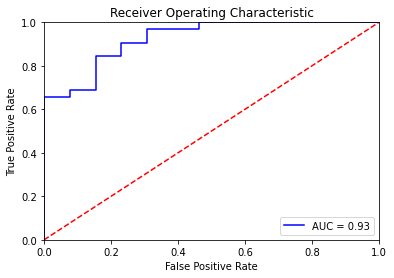

In [43]:
# Logistic - ROC
plot_auc_roc(log_reg)

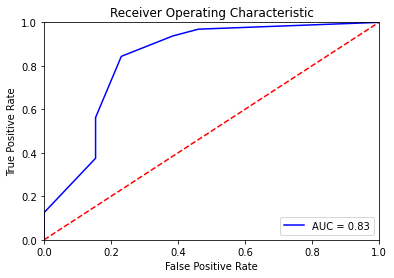

In [44]:
# Decision tree - ROC
plot_auc_roc(tree)

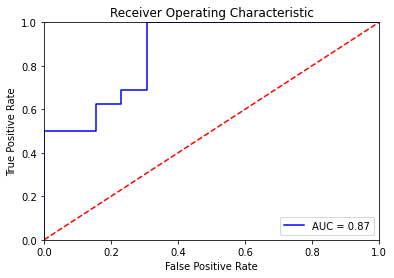

In [45]:
# Gradient boosting - roc
plot_auc_roc(boost)

### step 7) 모델 성능 평가

In [61]:
# Logistic Regression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test,lg_y_hat)
print("Logistic Regression 평가 지표",'\n')
print(lg_report)

print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat) )


Logistic Regression 평가 지표 

              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.90      0.84      0.87        32

    accuracy                           0.82        45
   macro avg       0.78      0.81      0.79        45
weighted avg       0.83      0.82      0.83        45

accuracy 0.8222222222222222
precision 0.9
recall 0.84375
f1 0.870967741935484


In [60]:
# Decision tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test,tree_y_hat)
print("Decision tree 평가 지표",'\n')
print(tree_report)

print('accuracy', metrics.accuracy_score(y_test,tree_y_hat) )
print('precision', metrics.precision_score(y_test,tree_y_hat) )
print('recall', metrics.recall_score(y_test,tree_y_hat) )
print('f1', metrics.f1_score(y_test,tree_y_hat) )


Decision tree 평가 지표 

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.86      0.94      0.90        32

    accuracy                           0.84        45
   macro avg       0.83      0.78      0.80        45
weighted avg       0.84      0.84      0.84        45

accuracy 0.8444444444444444
precision 0.8571428571428571
recall 0.9375
f1 0.8955223880597014


In [59]:
# Grandient boosting 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test,boost_y_hat)
print("Grandient  boosting 평가 지표",'\n')
print(boost_report)

print('accuracy', metrics.accuracy_score(y_test,boost_y_hat) )
print('precision', metrics.precision_score(y_test,boost_y_hat) )
print('recall', metrics.recall_score(y_test,boost_y_hat) )
print('f1', metrics.f1_score(y_test,boost_y_hat) )


Grandient  boosting 평가 지표 

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.87      0.84      0.86        32

    accuracy                           0.80        45
   macro avg       0.76      0.77      0.76        45
weighted avg       0.81      0.80      0.80        45

accuracy 0.8
precision 0.8709677419354839
recall 0.84375
f1 0.8571428571428571


In [57]:
precision_list = []
recall_list=[]

# Logistic
precision_list.append(metrics.precision_score(y_test,lg_y_hat))
recall_list.append(metrics.recall_score(y_test,lg_y_hat))

# decision
precision_list.append(metrics.precision_score(y_test,tree_y_hat))
recall_list.append(metrics.recall_score(y_test,tree_y_hat))

# boost
precision_list.append(metrics.precision_score(y_test,boost_y_hat))
recall_list.append(metrics.recall_score(y_test,boost_y_hat))

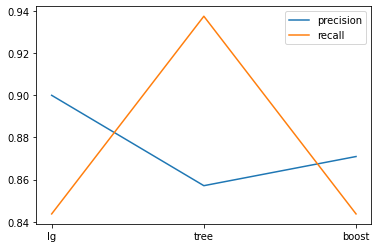

In [58]:
plt.plot(['lg','tree','boost'],precision_list, label='precision')
plt.plot(['lg','tree','boost'],recall_list, label='recall')
plt.legend()
plt.show()

recall값이 높아야 심장병 오진단률이 낮아짐 <br>
-> recall값이 높은 모델 선택 <br>
-> 마냥 recall값이 높은 모델을 선택하는 건 아님 (precision이 90이상에 recall이 몇 이상) 